In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os

# Ruta del directorio que contiene las bases de datos
ruta_directorio = r'C:\Users\j31660\OneDrive - Netafim\Desktop\Inteligencia comercial\10.0 Maestria\DATA_BASE_CIERRE_AGRICOLA'

# Obtener la lista de archivos en el directorio
archivos = os.listdir(ruta_directorio)

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

# Leer cada archivo y almacenar el DataFrame en el diccionario
for archivo in archivos:
    if archivo.endswith('.csv'):
        ruta_archivo = os.path.join(ruta_directorio, archivo)
        # Usar el nombre del archivo como clave en el diccionario
        dataframes[archivo] = pd.read_csv(ruta_archivo, encoding='latin1')

# Fusionar los DataFrames usando los encabezados de la fila 1 como claves
df_final = pd.concat(dataframes.values(), ignore_index=True)

# Imprimir el DataFrame final
print(df_final)




        Anio  Idestado       Nomestado  Idddr          Nomddr  Idcader  \
0       2013         1  Aguascalientes      1  Aguascalientes        1   
1       2013         1  Aguascalientes      1  Aguascalientes        1   
2       2013         1  Aguascalientes      1  Aguascalientes        1   
3       2013         1  Aguascalientes      1  Aguascalientes        1   
4       2013         1  Aguascalientes      1  Aguascalientes        1   
...      ...       ...             ...    ...             ...      ...   
352774  2022        32       Zacatecas    190           Jalpa        4   
352775  2022        32       Zacatecas    190           Jalpa        4   
352776  2022        32       Zacatecas    190           Jalpa        4   
352777  2022        32       Zacatecas    190           Jalpa        4   
352778  2022        32       Zacatecas    190           Jalpa        4   

              Nomcader  Idmunicipio    Nommunicipio  Idciclo  ... Nomunidad  \
0       Aguascalientes          

In [4]:
# Imprimir las columnas del DataFrame final
print(df_final.columns)


Index(['Anio', 'Idestado', 'Nomestado', 'Idddr', 'Nomddr', 'Idcader',
       'Nomcader', 'Idmunicipio', 'Nommunicipio', 'Idciclo',
       'Nomcicloproductivo', 'Idmodalidad', 'Nommodalidad', 'Idunidadmedida',
       'Nomunidad', 'Idcultivo', 'Nomcultivo', 'Sembrada', 'Cosechada',
       'Siniestrada', 'Volumenproduccion', 'Rendimiento', 'Preciomediorural',
       'Valorproduccion'],
      dtype='object')


In [5]:
# Seleccionar las columnas de interés
columnas_interes = ['Anio', 'Nomestado', 'Nomcicloproductivo', 'Nommodalidad', 'Nomcultivo', 'Volumenproduccion', 'Valorproduccion']

# Crear un nuevo DataFrame con las columnas de interés
df_nuevo = df_final[columnas_interes]

# Consolidar las columnas Volumenproduccion y Valorproduccion sumándolas
df_consolidado = df_nuevo.groupby(['Anio', 'Nomestado', 'Nomcicloproductivo', 'Nommodalidad', 'Nomcultivo']).agg({'Volumenproduccion': 'sum', 'Valorproduccion': 'sum'}).reset_index()

# Imprimir las primeras filas del nuevo DataFrame consolidado
print(df_consolidado.head())


   Anio       Nomestado Nomcicloproductivo Nommodalidad  \
0  2013  Aguascalientes     Otoño-Invierno        Riego   
1  2013  Aguascalientes     Otoño-Invierno        Riego   
2  2013  Aguascalientes     Otoño-Invierno        Riego   
3  2013  Aguascalientes     Otoño-Invierno        Riego   
4  2013  Aguascalientes     Otoño-Invierno        Riego   

                 Nomcultivo  Volumenproduccion  Valorproduccion  
0                    Acelga               48.0        193899.84  
1                       Ajo             3522.0      54016296.94  
2  Avena forrajera en verde           110729.0      56662633.31  
3                   Betabel               39.0        318500.13  
4                   Brócoli             4523.0      26960349.30  


In [14]:
# Seleccionar las columnas de interés
columnas_interes = ['Anio', 'Nomestado', 'Nomcicloproductivo', 'Nommodalidad', 'Nomcultivo', 'Sembrada', 'Volumenproduccion', 'Valorproduccion']

# Crear un nuevo DataFrame con las columnas de interés
df_nuevo = df_final[columnas_interes]

# Consolidar las columnas Sembrada, Volumenproduccion y Valorproduccion sumándolas
df_consolidado = df_nuevo.groupby(['Anio', 'Nomestado', 'Nomcicloproductivo', 'Nommodalidad', 'Nomcultivo']).agg({
    'Sembrada': 'sum',
    'Volumenproduccion': 'sum',
    'Valorproduccion': 'sum'
}).reset_index()

# Convertir la columna 'Sembrada' a tipo float
df_consolidado['Sembrada'] = pd.to_numeric(df_consolidado['Sembrada'], errors='coerce')

# Calcular la columna de rendimiento promedio (Volumenproduccion / Sembrada)
df_consolidado['Rendimiento_promedio'] = df_consolidado['Volumenproduccion'] / df_consolidado['Sembrada']

# Calcular la columna de precio medio por tonelada (Valorproduccion / Volumenproduccion)
df_consolidado['Precio_medio_por_tonelada'] = df_consolidado['Valorproduccion'] / df_consolidado['Volumenproduccion']

# Imprimir las primeras filas del nuevo DataFrame consolidado con las columnas calculadas
print(df_consolidado.head())

# Calcular la columna de rendimiento promedio (Volumenproduccion / Sembrada)
df_consolidado['Rendimiento_promedio'] = df_consolidado['Volumenproduccion'] / df_consolidado['Sembrada']

# Calcular la columna de precio medio por tonelada (Valorproduccion / Volumenproduccion)
df_consolidado['Precio_medio_por_tonelada'] = df_consolidado['Valorproduccion'] / df_consolidado['Volumenproduccion']

# Imprimir las primeras filas del nuevo DataFrame consolidado con las columnas calculadas
print(df_consolidado.head())


   Anio       Nomestado Nomcicloproductivo Nommodalidad  \
0  2013  Aguascalientes     Otoño-Invierno        Riego   
1  2013  Aguascalientes     Otoño-Invierno        Riego   
2  2013  Aguascalientes     Otoño-Invierno        Riego   
3  2013  Aguascalientes     Otoño-Invierno        Riego   
4  2013  Aguascalientes     Otoño-Invierno        Riego   

                 Nomcultivo  Sembrada  Volumenproduccion  Valorproduccion  \
0                    Acelga       5.0               48.0        193899.84   
1                       Ajo     234.0             3522.0      54016296.94   
2  Avena forrajera en verde    4193.0           110729.0      56662633.31   
3                   Betabel       3.0               39.0        318500.13   
4                   Brócoli     281.0             4523.0      26960349.30   

   Rendimiento_promedio  Precio_medio_por_tonelada  
0              9.600000                4039.580000  
1             15.051282               15336.824798  
2             26.408061

In [16]:
# Obtener todos los cultivos distintos y ordenarlos alfabéticamente
cultivos_distintos_ordenados = sorted(df_consolidado['Nomcultivo'].unique())

# Imprimir la lista de cultivos distintos ordenados alfabéticamente
print(cultivos_distintos_ordenados)



['Aceituna', 'Acelga', 'Achiote', 'Agapando', 'Agapando (gruesa)', 'Agave', 'Aguacate', 'Ajo', 'Ajonjolí', 'Albahaca', 'Albricia', 'Alcachofa', 'Alcatraz', 'Alcatraz (gruesa)', 'Alfalfa achicalada', 'Alfalfa verde', 'Algarrobo', 'Algodón hueso', 'Alhelí', 'Alhelí (gruesa)', 'Alhelí (manojo)', 'Almácigo', 'Alpiste', 'Alpiste forrajero verde', 'Alpiste grano', 'Alpiste ornamental', 'Alpiste verde', 'Alstroemeria', 'Alstroemeria (gruesa)', 'Amaranto', 'Anturios', 'Anturios (gruesa)', 'Anís', 'Apio', 'Aretillo', 'Aretillo (planta)', 'Arrayán', 'Arroz palay', 'Arvejón', 'Arándano', 'Aster', 'Aster (manojo)', 'Ave del paraíso', 'Ave del paraíso (gruesa)', 'Avena forrajera en verde', 'Avena grano', 'Azucena', 'Baby back choi', 'Bambú', 'Bangaña', 'Begonia', 'Begonia (planta)', 'Belén', 'Belén (planta)', 'Berenjena', 'Betabel', 'Boi choi', 'Brócoli', 'Cacahuate', 'Cacao', 'Café cereza', 'Caimito', 'Calabacita', 'Calabaza', 'Calabaza semilla o chihua', 'Calancoe', 'Calancoe (planta)', 'Camote',

In [6]:
# Lista de cultivos de interés
cultivos_interes = ['Arándano', 'Frambuesa', 'Fresa', 'Zarzamora']

# Filtrar el DataFrame original
df_berries = df_final[df_final['Nomcultivo'].isin(cultivos_interes)].copy()

# Imprimir las primeras filas del nuevo DataFrame df_berries
print(df_berries.head())


     Anio  Idestado        Nomestado  Idddr          Nomddr  Idcader  \
213  2013         1   Aguascalientes      1  Aguascalientes        3   
553  2013         2  Baja California      2        Ensenada        3   
568  2013         2  Baja California      2        Ensenada        4   
569  2013         2  Baja California      2        Ensenada        4   
617  2013         2  Baja California      2        Ensenada        4   

        Nomcader  Idmunicipio         Nommunicipio  Idciclo  ... Nomunidad  \
213     Pabellón            6  Pabellón de Arteaga        3  ...  Tonelada   
553     Ensenada            1             Ensenada        3  ...  Tonelada   
568  San Quintín            1             Ensenada        1  ...  Tonelada   
569  San Quintín            1             Ensenada        1  ...  Tonelada   
617  San Quintín            1             Ensenada        3  ...  Tonelada   

     Idcultivo Nomcultivo  Sembrada Cosechada  Siniestrada Volumenproduccion  \
213    6820000    

In [18]:
pip install altair


     -------------------------------------- 516.2/516.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import altair as alt

# Filtrar DataFrame para los cultivos de interés
cultivos_interes = ['Arándano', 'Frambuesa', 'Fresa', 'Zarzamora']
df_berries = df_final[df_final['Nomcultivo'].isin(cultivos_interes)].copy()

# Crear gráfico de superficie sembrada a lo largo de los años
chart_sembrada = alt.Chart(df_berries).mark_line().encode(
    x='Anio:O',
    y='Sembrada:Q',
    color='Nomcultivo:N',
    tooltip=['Nomcultivo:N', 'Anio:O', 'Sembrada:Q']
).properties(
    title='Histórico de Superficie Sembrada por Cultivo'
)

# Crear gráfico de valor de producción a lo largo de los años
chart_valorproduccion = alt.Chart(df_berries).mark_line().encode(
    x='Anio:O',
    y='Valorproduccion:Q',
    color='Nomcultivo:N',
    tooltip=['Nomcultivo:N', 'Anio:O', 'Valorproduccion:Q']
).properties(
    title='Histórico de Valor de Producción por Cultivo'
)

# Mostrar gráficos interactivos
(chart_sembrada | chart_valorproduccion).interactive()


alt.HConcatChart(...)

In [22]:
import altair as alt

# Filtrar DataFrame para los cultivos de interés
cultivos_interes = ['Arándano', 'Frambuesa', 'Fresa', 'Zarzamora']
df_berries = df_final[df_final['Nomcultivo'].isin(cultivos_interes)].copy()

# Crear gráfico de línea para superficie sembrada
chart_sembrada = alt.Chart(df_berries).mark_line().encode(
    x='Anio:O',
    y='Sembrada:Q',
    color='Nomcultivo:N',
    tooltip=['Nomcultivo:N', 'Anio:O', 'Sembrada:Q']
).properties(
    width=800,
    title='Histórico de Superficie Sembrada por Cultivo'
).interactive()

# Crear gráfico de línea para valor de producción
chart_valor = alt.Chart(df_berries).mark_line().encode(
    x='Anio:O',
    y='Valorproduccion:Q',
    color='Nomcultivo:N',
    tooltip=['Nomcultivo:N', 'Anio:O', 'Valorproduccion:Q']
).properties(
    width=800,
    title='Histórico de Valor de Producción por Cultivo'
).interactive()

# Mostrar los dos gráficos por separado
(chart_sembrada, chart_valor)



(alt.Chart(...), alt.Chart(...))

In [23]:
from IPython.display import display

# ...

# Mostrar los dos gráficos por separado
display(chart_sembrada)
display(chart_valor)


alt.Chart(...)

alt.Chart(...)

In [29]:
pip install folium


     ------------------------------------ 100.3/100.3 kB 958.1 kB/s eta 0:00:00


In [33]:
!pip install geopandas




  Using cached geopandas-0.14.1-py3-none-any.whl (1.1 MB)
     ---------------------------------------- 1.4/1.4 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 6.2 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [38]:
!pip install folium



In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado df_berries con las columnas Sembrada y Nomestado

# Especifica la ruta del archivo geojson descargado
ruta_archivo_geojson = r'C:\Users\j31660\Downloads\estados.json'

# Cargar datos geoespaciales de los estados de México desde el archivo local
mexico = gpd.read_file(ruta_archivo_geojson)

# Fusionar los datos geoespaciales de México con tu DataFrame df_berries por entidad federativa
df_mapa = mexico.merge(df_berries.groupby('Nomestado')['Sembrada'].sum().reset_index(), left_on='name', right_on='Nomestado')

# Visualizar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_mapa.plot(column='Sembrada', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
ax.set_title('Superficie Sembrada por Estado en México', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar la leyenda
vmin, vmax = df_mapa['Sembrada'].min(), df_mapa['Sembrada'].max()
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.show()





DriverError: 'C:\Users\j31660\Downloads\estados.json' not recognized as a supported file format.

# WEB SCRAPING

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_expo_agro():
    # URL del sitio web de Expo Agro Gto
    url = 'https://www.expoagrogto.com/'

    # Realizar una solicitud HTTP y obtener el contenido de la página
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Identificar elementos HTML relevantes y extraer información
    # Adaptar según la estructura específica del sitio web
    noticias = soup.find_all('div', class_='clg-blog-item')

    # Lista para almacenar las noticias relevantes
    noticias_relevantes = []

    for noticia in noticias:
        titulo = noticia.find('h4').text.strip()
        fecha = noticia.find('span', class_='clg-date').text.strip()
        contenido = noticia.find('p').text.strip()

        # Verificar si el contenido de la noticia menciona alguna de las berries
        if any(berry in contenido.lower() for berry in ['fresa', 'arándano', 'frambuesa', 'zarzamora']):
            noticias_relevantes.append({'Título': titulo, 'Fecha': fecha, 'Contenido': contenido})

    # Crear un DataFrame con las noticias relevantes
    df_noticias = pd.DataFrame(noticias_relevantes)

    # Imprimir el DataFrame
    print(df_noticias)

if __name__ == "__main__":
    scrape_expo_agro()



Empty DataFrame
Columns: []
Index: []


In [51]:
import requests
from bs4 import BeautifulSoup

# URL de la página
url = 'https://es.producepay.com/blog/la-produccion-de-berries-en-mexico-en-los-ultimos-anos/'

# Realizar la solicitud HTTP
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscar la sección del blog por la clase 'blog-post-content'
    blog_content = soup.find('div', class_='blog-post-content')

    # Verificar si se encontró la sección del blog
    if blog_content:
        # Extraer el texto dentro de la sección del blog
        blog_text = blog_content.get_text(separator='\n')

        # Imprimir el texto del blog
        print(blog_text)
    else:
        print('No se encontró la sección del blog en la página.')

else:
    print(f'Error al realizar la solicitud. Código de estado: {response.status_code}')



No se encontró la sección del blog en la página.


In [52]:
import requests
from bs4 import BeautifulSoup

# URL de la página
url = 'https://es.producepay.com/blog/la-produccion-de-berries-en-mexico-en-los-ultimos-anos/'

# Realizar la solicitud HTTP
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraer todo el texto de la página
    page_text = soup.get_text(separator='\n')

    # Imprimir el texto completo de la página
    print(page_text)
else:
    print(f'Error al realizar la solicitud. Código de estado: {response.status_code}')








































La producción de berries en México en los últimos años














































































































































 
































































 

















																			Acceso																	






¿Qué te trae a ProducePay?






Administra tu solicitud de Pre-Cosecha


Explora la Información de Mercado


Accede a nuestros servicios comerciales










Regístrate






 Acceso












Administra y carga envíos


Seguimiento de pagos










 Acceso






































































Comercio								




















Para compradores 


Conéctese de manera eficiente con compradores verificados para la venta de productos frescos.
























Para vendedores 


Obtenga productos de alta calidad de productores confiables y verificados previamente.


















# Análisis de TEXTO

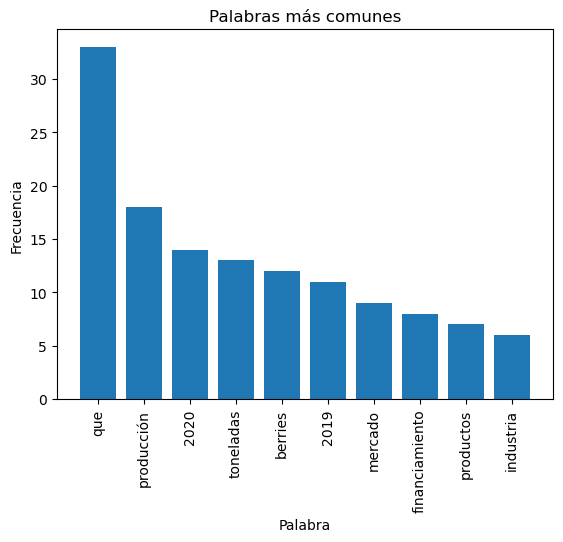

In [57]:
from collections import Counter
import matplotlib.pyplot as plt
import string

def preprocess_text(text):
    # Convierte el texto a minúsculas
    text = text.lower()

    # Elimina signos de puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Elimina palabras comunes (puedes personalizar esta lista)
    stop_words = ["el", "la", "los", "las", "por", "para", "de", "en", "y", "con", "se", "del", "un", "una", "al", "es", "lo", "su", "a", "como", "más", "sus", "le", "ha", "me", "si", "sin", "sobre", "entre"]
    
    # Elimina conectores
    connectors = ["y", "o", "pero", "porque", "además", "aunque", "sin embargo", "así que", "por lo tanto"]
    
    # Combina las listas de palabras a excluir
    stop_words += connectors
    
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

# Ejemplo de preprocesamiento
preprocessed_text = preprocess_text(page_text)

# Tokenizar el texto preprocesado en palabras
words = preprocessed_text.split()

# Calcular la frecuencia de palabras
word_freq = Counter(words)

# Visualizar las palabras más comunes
common_words = word_freq.most_common(10)

# Extraer palabras y frecuencias
labels, frequencies = zip(*common_words)

# Crear un gráfico de barras con las frecuencias
plt.bar(labels, frequencies)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes')

# Rotar las etiquetas del eje x verticalmente
plt.xticks(rotation='vertical')

plt.show()






In [58]:
from textblob import TextBlob

# Crear un objeto TextBlob
blob = TextBlob(page_text)

# Obtener el sentimiento del texto
sentiment = blob.sentiment
print("Sentimiento del texto:", sentiment)


Sentimiento del texto: Sentiment(polarity=0.10000000000000002, subjectivity=0.38)


In [59]:
import spacy

# Cargar el modelo de procesamiento de lenguaje natural de spaCy (necesitas instalarlo con pip install spacy)
nlp = spacy.load('es_core_news_sm')

# Procesar el texto con spaCy
doc = nlp(page_text)

# Extraer entidades nombradas
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Entidades Nombradas:", named_entities)


Entidades Nombradas: [('México', 'LOC'), ('ProducePay?\n\n\n\n\n\n\n', 'MISC'), ('Pre-Cosecha\n\n\nExplora la', 'MISC'), ('Información de Mercado\n\n\nAccede', 'ORG'), ('Regístrate\n\n\n\n\n\n\n Acceso\n\n\n\n\n\n\n\n\n\n\n\n\nAdministra', 'MISC'), ('Seguimiento', 'ORG'), ('Acceso\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nComercio', 'ORG'), ('Conéctese', 'PER'), ('Para vendedores \n\n\nObtenga', 'MISC'), ('Descarga gratis nuestro análisis de fresas\n\n\n', 'MISC'), ('ProducePay', 'MISC'), ('Financiamiento\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFinanciamiento Pre-Cosecha \n\n\nLos productores', 'MISC'), ('Financiamiento Quick-Pay \n\n\nDespués', 'MISC'), ('La inflación', 'MISC'), ('Información de Mercado\t\t\t\t\t\t\t\t\n\n\n\n\n\n\nRecursos\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCentro', 'LOC'), ('Obtenga', 'LOC'), ('Análisis', 'LOC'), ('Acceda', 'LOC')

In [60]:
pip install wordcloud matplotlib beautifulsoup4 nltk


Note: you may need to restart the kernel to use updated packages.


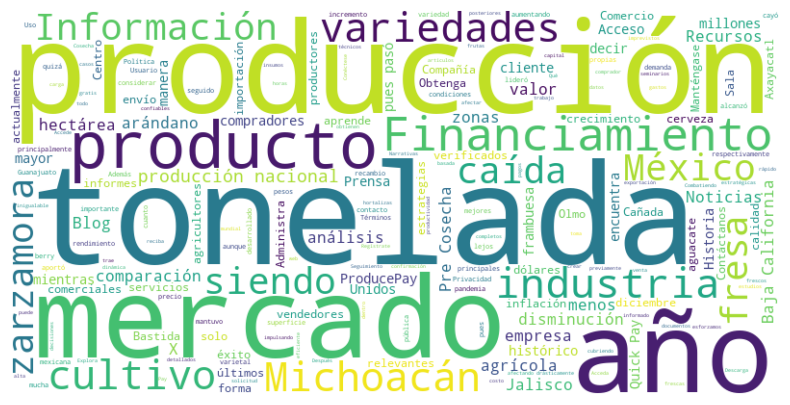

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import requests

# Obtener el contenido de la página web
url = 'https://es.producepay.com/blog/la-produccion-de-berries-en-mexico-en-los-ultimos-anos/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

# Eliminar palabras comunes y conectores
stop_words = set(stopwords.words('spanish'))
custom_stopwords = {'producepay', 'berries'}  # Agrega aquí otras palabras que quieras eliminar
stop_words = stop_words.union(custom_stopwords)

filtered_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
print(df_berries.columns)


Index(['Anio', 'Idestado', 'Nomestado', 'Idddr', 'Nomddr', 'Idcader',
       'Nomcader', 'Idmunicipio', 'Nommunicipio', 'Idciclo',
       'Nomcicloproductivo', 'Idmodalidad', 'Nommodalidad', 'Idunidadmedida',
       'Nomunidad', 'Idcultivo', 'Nomcultivo', 'Sembrada', 'Cosechada',
       'Siniestrada', 'Volumenproduccion', 'Rendimiento', 'Preciomediorural',
       'Valorproduccion'],
      dtype='object')


In [8]:
!pip install seaborn


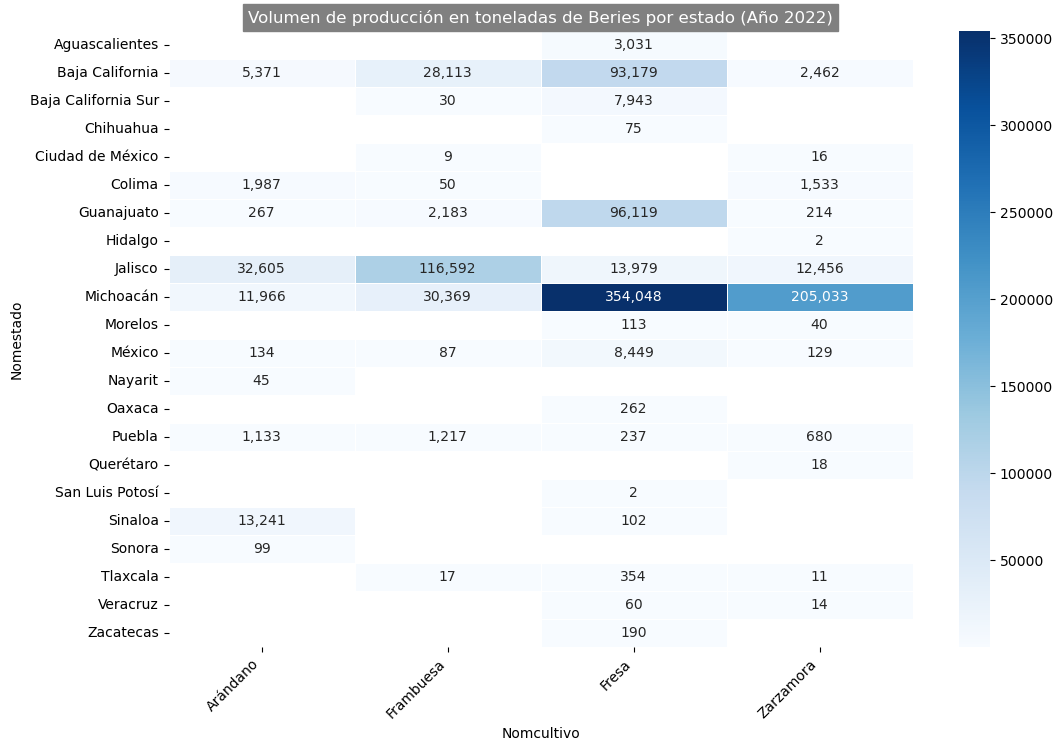

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar el DataFrame para obtener solo los datos del año 2022
df_berries_2022 = df_berries[df_berries['Anio'] == 2022].copy()

# Verificar si hay datos después de filtrar
if not df_berries_2022.empty:
    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))

    # Crear un DataFrame que contenga la relación entre 'Nomestado' y 'Nomcultivo' con 'Volumenproduccion' como valor
    df_relacion = df_berries_2022.pivot_table(index='Nomestado', columns='Nomcultivo', values='Volumenproduccion', aggfunc='sum')

    # Obtener los nombres de los estados y cultivos
    estados = df_relacion.index
    cultivos = df_relacion.columns

    # Crear el mapa de calor
    heatmap = sns.heatmap(df_relacion, cmap='Blues', annot=True, fmt=',.0f', linewidths=.5)

    # Formatear los números en el eje y para tener comas en los miles
    plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Asegurarse de que los nombres de los estados se muestren correctamente en el eje y
    heatmap.set_yticklabels(estados, rotation=0, ha='right')

    # Asegurarse de que los nombres de los cultivos se muestren correctamente en el eje x
    heatmap.set_xticklabels(cultivos, rotation=45, ha='right')

    # Personalizar el título con fondo gris y color blanco, centrado
    title = plt.title('Volumen de producción en toneladas de Beries por estado (Año 2022)', loc='center', backgroundcolor='gray', color='white')
    title.set_position([0.5, 1.02])  # Ajustar la posición del título

    plt.show()
else:
    print("No hay datos disponibles para el año 2022.")









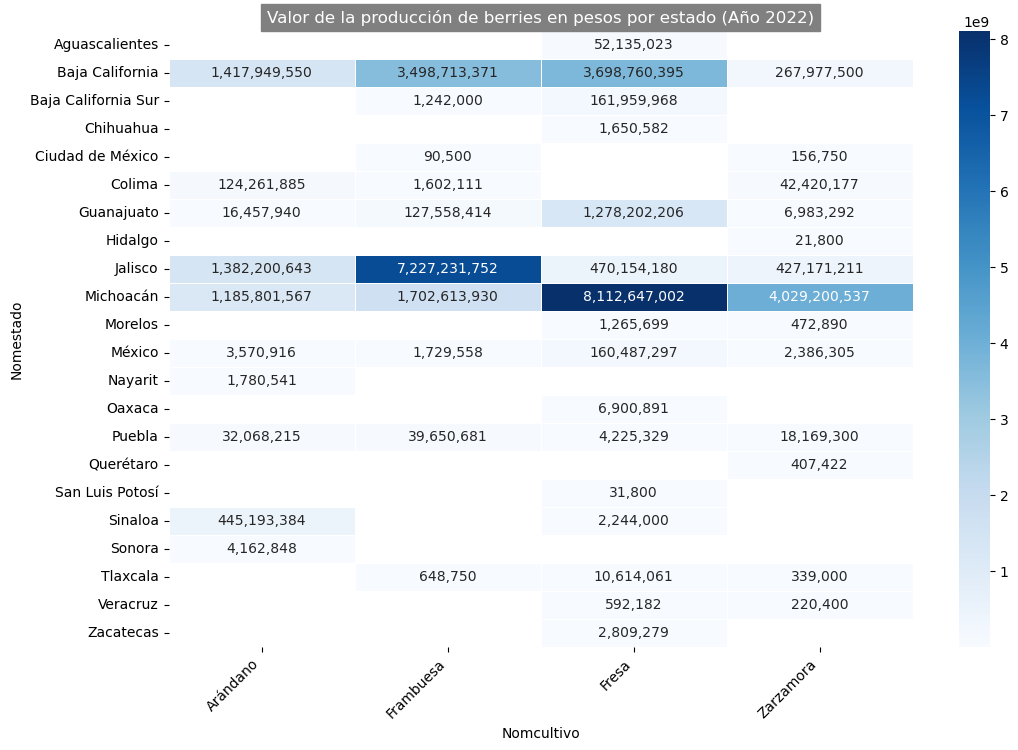

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar el DataFrame para obtener solo los datos del año 2022
df_berries_2022 = df_berries[df_berries['Anio'] == 2022].copy()

# Verificar si hay datos después de filtrar
if not df_berries_2022.empty:
    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))

    # Crear un DataFrame que contenga la relación entre 'Nomestado' y 'Nomcultivo' con 'Volumenproduccion' como valor
    df_relacion = df_berries_2022.pivot_table(index='Nomestado', columns='Nomcultivo', values='Valorproduccion', aggfunc='sum')

    # Obtener los nombres de los estados y cultivos
    estados = df_relacion.index
    cultivos = df_relacion.columns

    # Crear el mapa de calor
    heatmap = sns.heatmap(df_relacion, cmap='Blues', annot=True, fmt=',.0f', linewidths=.5)

    # Formatear los números en el eje y para tener comas en los miles
    plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Asegurarse de que los nombres de los estados se muestren correctamente en el eje y
    heatmap.set_yticklabels(estados, rotation=0, ha='right')

    # Asegurarse de que los nombres de los cultivos se muestren correctamente en el eje x
    heatmap.set_xticklabels(cultivos, rotation=45, ha='right')

    # Personalizar el título con fondo gris y color blanco, centrado
    title = plt.title('Valor de la producción de berries en pesos por estado (Año 2022)', loc='center', backgroundcolor='gray', color='white')
    title.set_position([0.5, 1.02])  # Ajustar la posición del título

    plt.show()
else:
    print("No hay datos disponibles para el año 2022.")


